<a href="https://colab.research.google.com/github/rayisl78/generativeAI/blob/main/credit_analysis_synthetic_data_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Written Executed by Dr. Ray Islam on 04/04/2023 @ 9pm
# Important Disclosure: The author assumes no liability for the accuracy of the data provided, as it is solely intended for personal research purposes. 
# Please use this code at your own risk and assume full responsibility for any consequences that may arise from its use.
# written in google co-lab


# Import libraries
import torch
import pandas as pd
import seaborn as sns
import torch.nn as nn

In [2]:
# Install CTGAN

!pip install ctgan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 KB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 66.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.0
    Uninstalling packaging-23.0:
      Successfully uninstalled packaging-23.0
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstallin

In [3]:
# Install table evaluator to analyze generated synthetic data

!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 53.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of table-evaluator to determine which version is compatible with other requirements. This could take a while.
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [1]:
from ctgan import CTGAN
from ctgan.synthesizers.ctgan import Generator

In [4]:
# Import training Data
data = pd.read_csv('./application_data_edited_2.csv')

In [5]:
# View training data
data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0
...,...,...,...,...,...,...,...,...,...,...
9988,0,Revolving loans,F,N,Y,1,135000.0,270000.0,13500.0,270000.0
9989,0,Cash loans,F,N,Y,0,166500.0,1006920.0,51543.0,900000.0
9990,0,Cash loans,M,N,Y,0,225000.0,497520.0,53581.5,450000.0
9991,0,Cash loans,F,N,N,0,360000.0,348264.0,27643.5,315000.0


In [6]:
# Declare Categorical Columns

categorical_features = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN']

In [7]:
# Declare Continuous Columns

continuous_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']

In [8]:
# Train Model

from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(data, categorical_features, epochs = 100000)

Epoch 1, Loss G:  0.7732,Loss D: -0.2325
Epoch 2, Loss G:  0.1459,Loss D: -0.0484
Epoch 3, Loss G:  0.1454,Loss D:  0.0353
Epoch 4, Loss G:  0.2023,Loss D: -0.0785
Epoch 5, Loss G: -0.2285,Loss D:  0.0832
Epoch 6, Loss G: -0.1300,Loss D:  0.0710
Epoch 7, Loss G: -0.4927,Loss D:  0.2175
Epoch 8, Loss G: -0.4423,Loss D: -0.0409
Epoch 9, Loss G: -0.5644,Loss D:  0.0714
Epoch 10, Loss G: -0.7789,Loss D:  0.1133
Epoch 11, Loss G: -0.8007,Loss D: -0.1072
Epoch 12, Loss G: -0.9480,Loss D: -0.0509
Epoch 13, Loss G: -1.1059,Loss D:  0.1151
Epoch 14, Loss G: -0.8817,Loss D: -0.0535
Epoch 15, Loss G: -0.7679,Loss D: -0.1057
Epoch 16, Loss G: -1.0416,Loss D: -0.0066
Epoch 17, Loss G: -1.1968,Loss D:  0.1053
Epoch 18, Loss G: -1.2232,Loss D: -0.1423
Epoch 19, Loss G: -1.3469,Loss D:  0.0384
Epoch 20, Loss G: -1.2572,Loss D: -0.0070
Epoch 21, Loss G: -1.1481,Loss D: -0.0132
Epoch 22, Loss G: -1.3132,Loss D:  0.0370
Epoch 23, Loss G: -1.2544,Loss D:  0.0180
Epoch 24, Loss G: -1.4506,Loss D:  0.0128
E

KeyboardInterrupt: ignored

In [27]:
# Generate synthetic_data
synthetic_data = ctgan.sample(10000)

In [28]:
# View synthetic_data

synthetic_data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,0,Cash loans,M,Y,Y,1,81344.432549,1.424320e+05,8673.226477,1.495065e+05
1,0,Revolving loans,F,N,Y,1,120843.789812,8.945594e+04,8068.255528,1.401211e+05
2,0,Cash loans,F,N,N,1,467339.431328,6.406770e+05,43498.949348,1.343218e+06
3,1,Cash loans,F,N,Y,0,71894.165818,2.466443e+05,21511.229864,2.026764e+05
4,0,Cash loans,F,N,N,1,225341.366314,8.307647e+05,32539.198199,8.143544e+05
...,...,...,...,...,...,...,...,...,...,...
9995,0,Cash loans,F,N,N,0,102785.452100,6.980667e+05,24321.944665,3.258861e+05
9996,0,Cash loans,M,N,Y,1,175763.797299,3.721657e+05,21518.056108,2.342234e+05
9997,0,Revolving loans,F,N,Y,0,134281.834321,8.276585e+05,27211.434452,6.874062e+05
9998,0,Cash loans,M,N,N,0,218394.459106,1.129176e+06,32034.602387,8.186743e+05


In [29]:
# round continuous data to 1 decimal place
# assuming synthetic_data is a pandas DataFrame containing the generated data

continuous_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']

for col in continuous_cols:
    synthetic_data[col] = synthetic_data[col].apply(lambda x: round(x, 1))

In [30]:
# View Synthetic Data
synthetic_data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,0,Cash loans,M,Y,Y,1,81344.4,142432.0,8673.2,149506.5
1,0,Revolving loans,F,N,Y,1,120843.8,89455.9,8068.3,140121.1
2,0,Cash loans,F,N,N,1,467339.4,640677.0,43498.9,1343217.7
3,1,Cash loans,F,N,Y,0,71894.2,246644.3,21511.2,202676.4
4,0,Cash loans,F,N,N,1,225341.4,830764.7,32539.2,814354.4
...,...,...,...,...,...,...,...,...,...,...
9995,0,Cash loans,F,N,N,0,102785.5,698066.7,24321.9,325886.1
9996,0,Cash loans,M,N,Y,1,175763.8,372165.7,21518.1,234223.4
9997,0,Revolving loans,F,N,Y,0,134281.8,827658.5,27211.4,687406.2
9998,0,Cash loans,M,N,N,0,218394.5,1129175.8,32034.6,818674.3


In [31]:
# Export DataFrame to CSV file
synthetic_data.to_csv('Synthetic_credit_analysis_Data.csv', index=False)

In [26]:
# Convert DataFrame to a string
data_str = synthetic_data.to_string(index=False)

# Export data to text file
with open('Synthetic_credit_analysis_Data.txt', 'w') as f:
    f.write(data_str)

In [32]:
# Re-import after deleting negative rows
synthetic_data = pd.read_csv('./Synthetic_credit_analysis_Data_10.csv')

In [33]:
# View Synthetic Data
synthetic_data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,0,Cash loans,M,Y,Y,1,81344.4,142432.0,8673.2,149506.5
1,0,Revolving loans,F,N,Y,1,120843.8,89455.9,8068.3,140121.1
2,0,Cash loans,F,N,N,1,467339.4,640677.0,43498.9,1343217.7
3,1,Cash loans,F,N,Y,0,71894.2,246644.3,21511.2,202676.4
4,0,Cash loans,F,N,N,1,225341.4,830764.7,32539.2,814354.4
...,...,...,...,...,...,...,...,...,...,...
9992,0,Cash loans,F,N,N,0,102785.5,698066.7,24321.9,325886.1
9993,0,Cash loans,M,N,Y,1,175763.8,372165.7,21518.1,234223.4
9994,0,Revolving loans,F,N,Y,0,134281.8,827658.5,27211.4,687406.2
9995,0,Cash loans,M,N,N,0,218394.5,1129175.8,32034.6,818674.3


(9993, 10) (9997, 10)


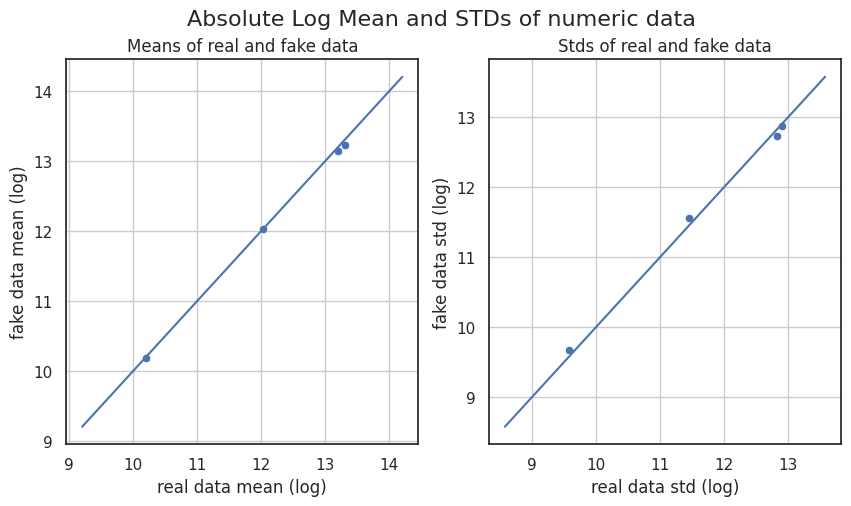

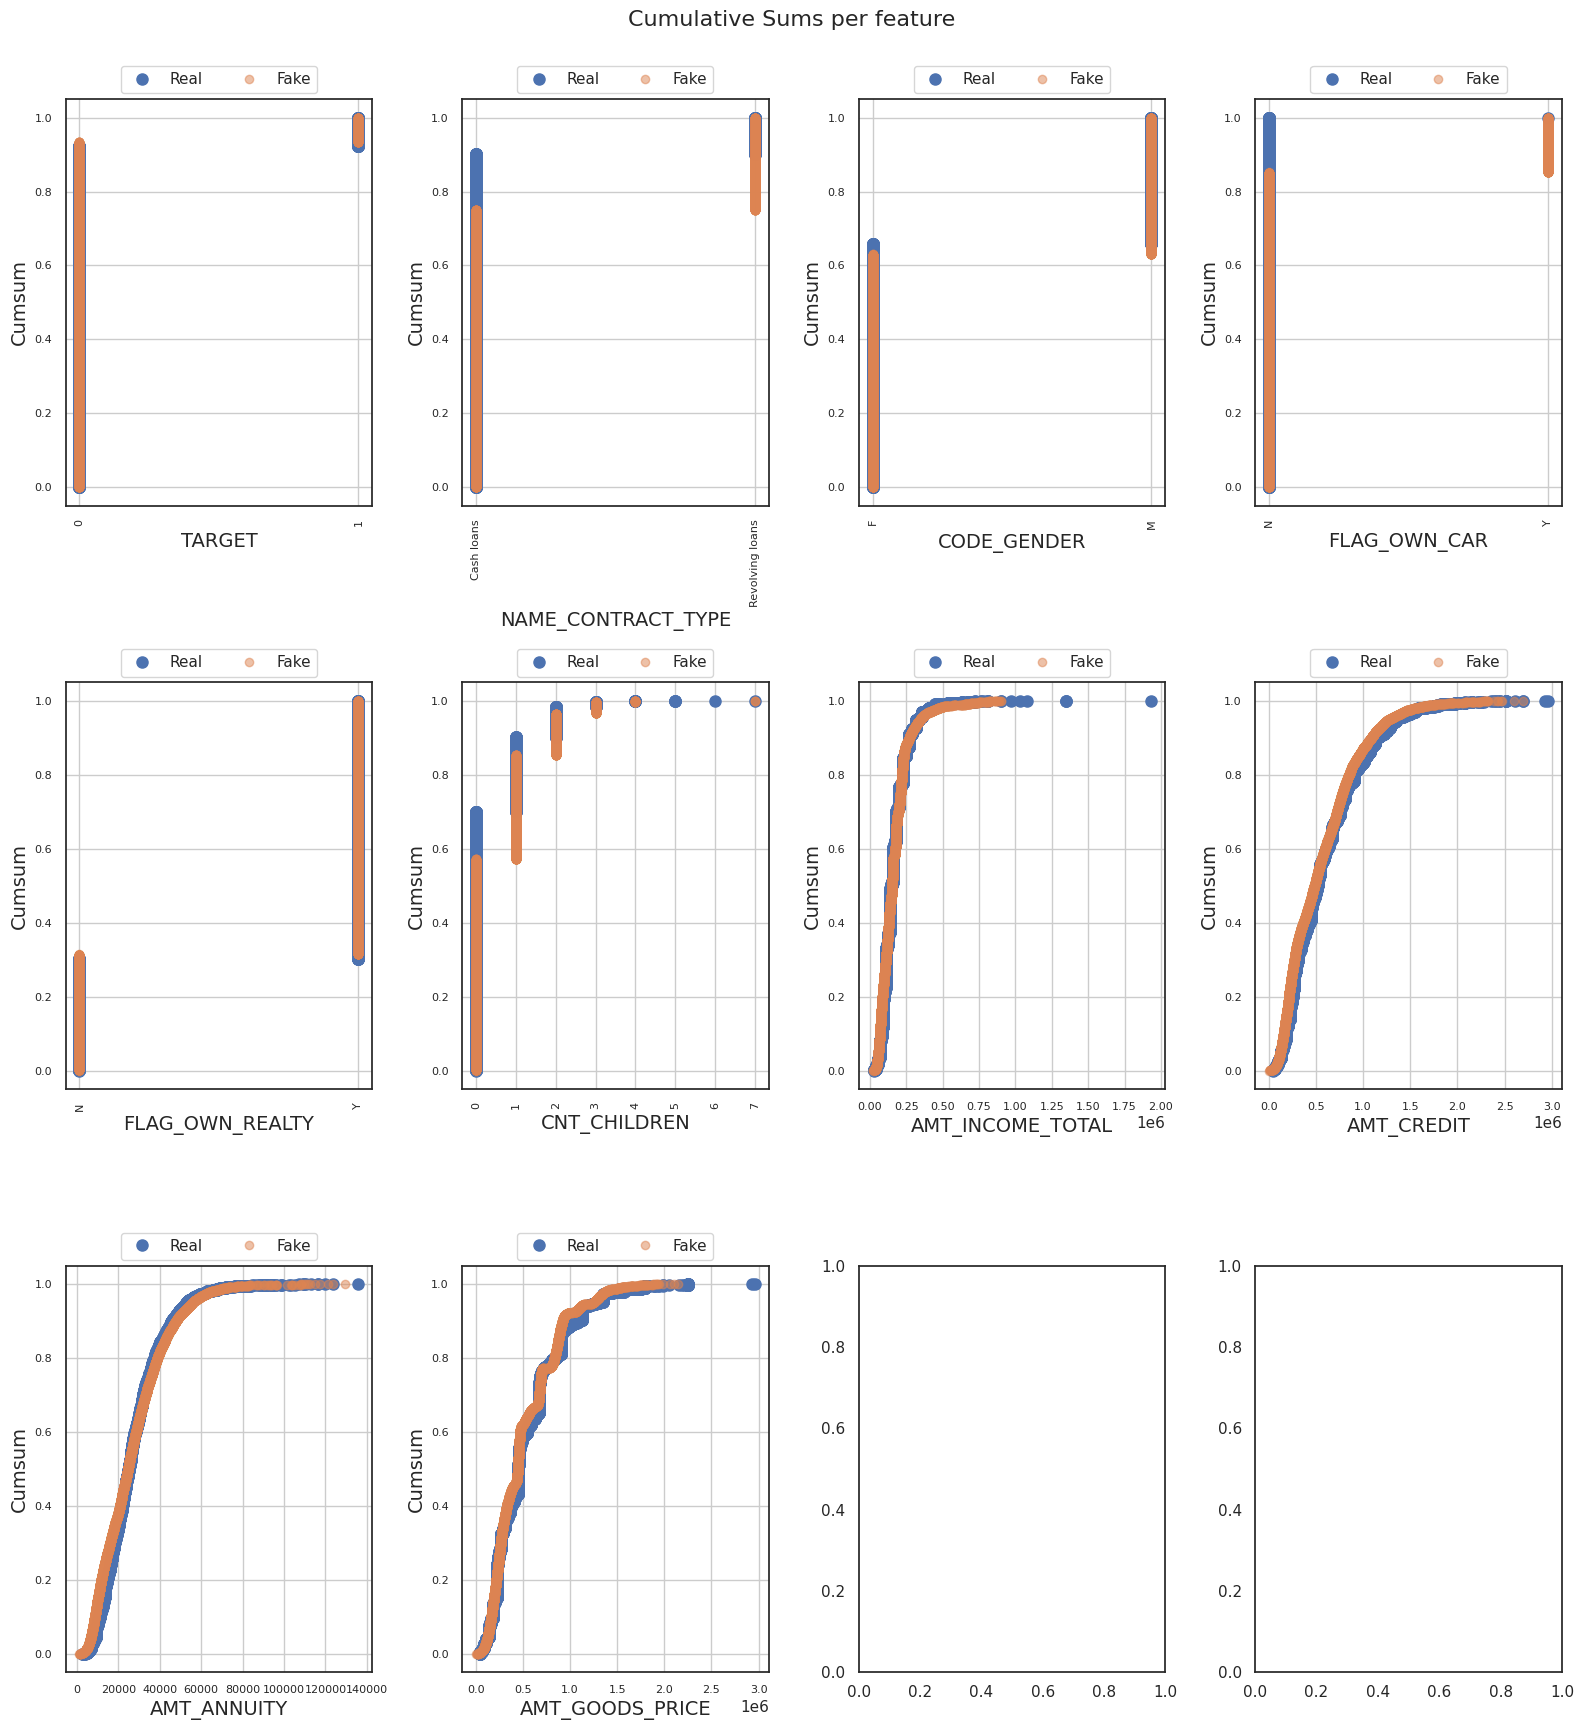

/usr/local/lib/python3.9/dist-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
/usr/local/lib/python3.9/dist-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
/usr/local/lib/python3.9/dist-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self

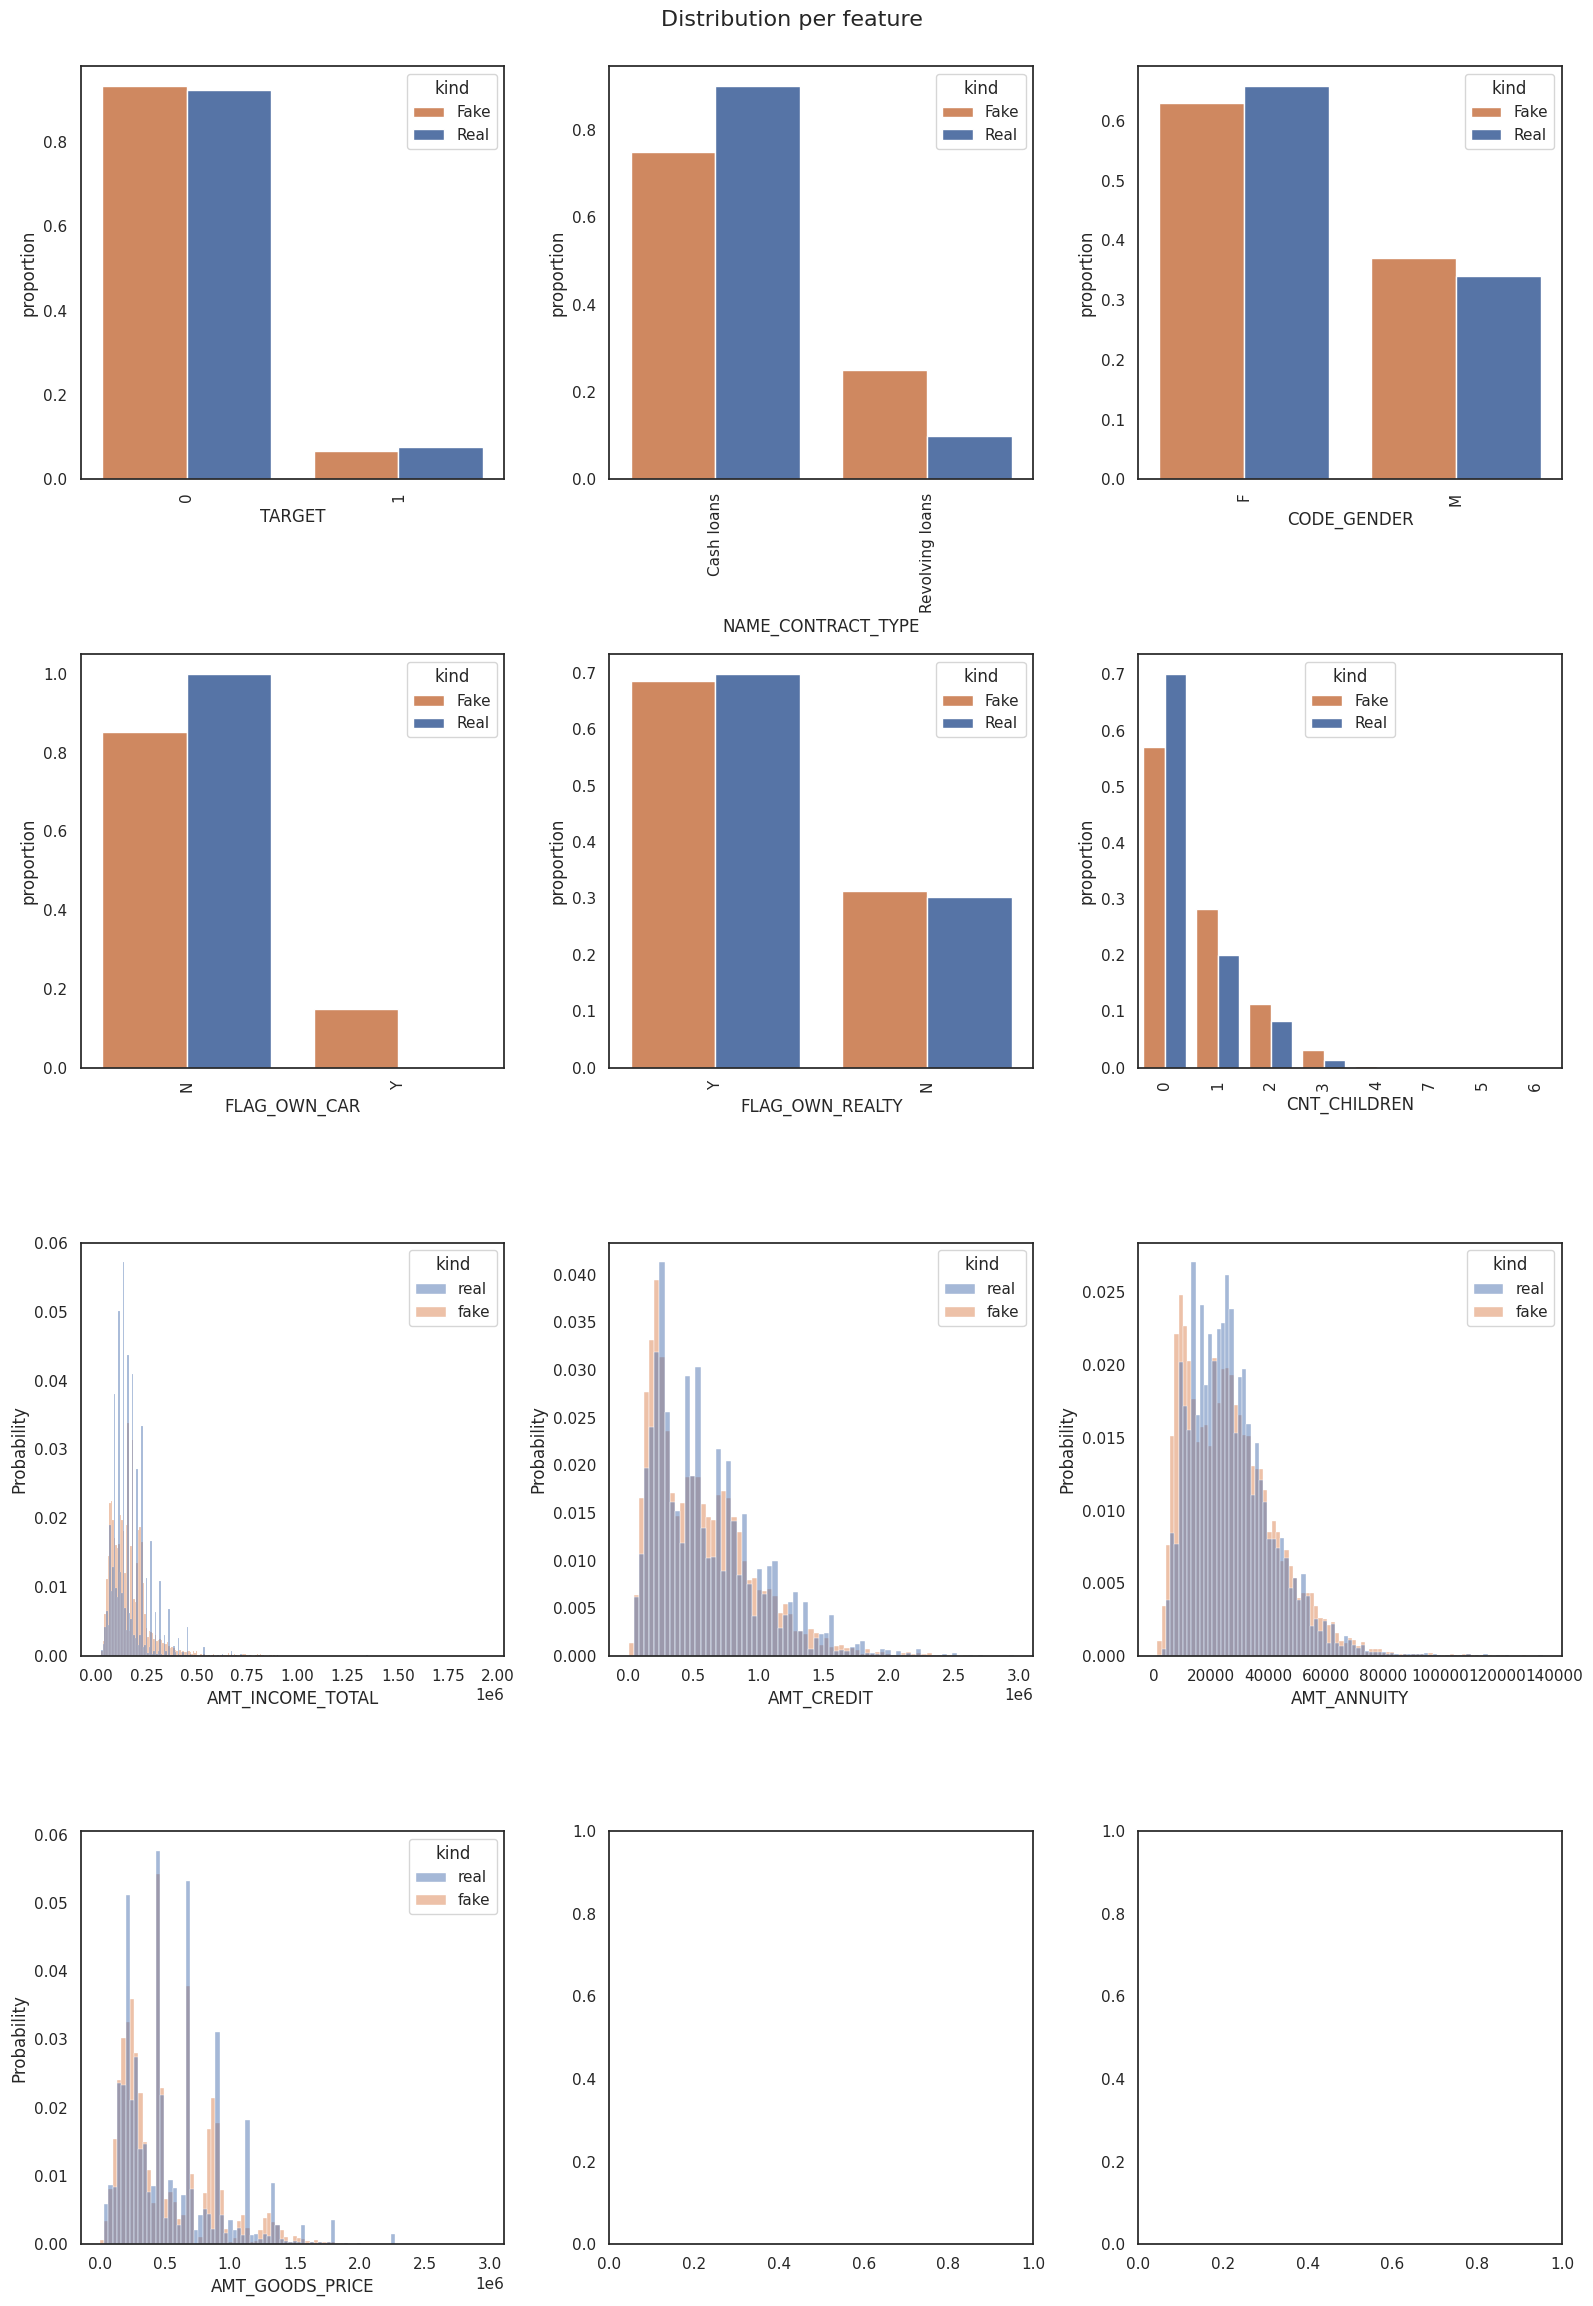

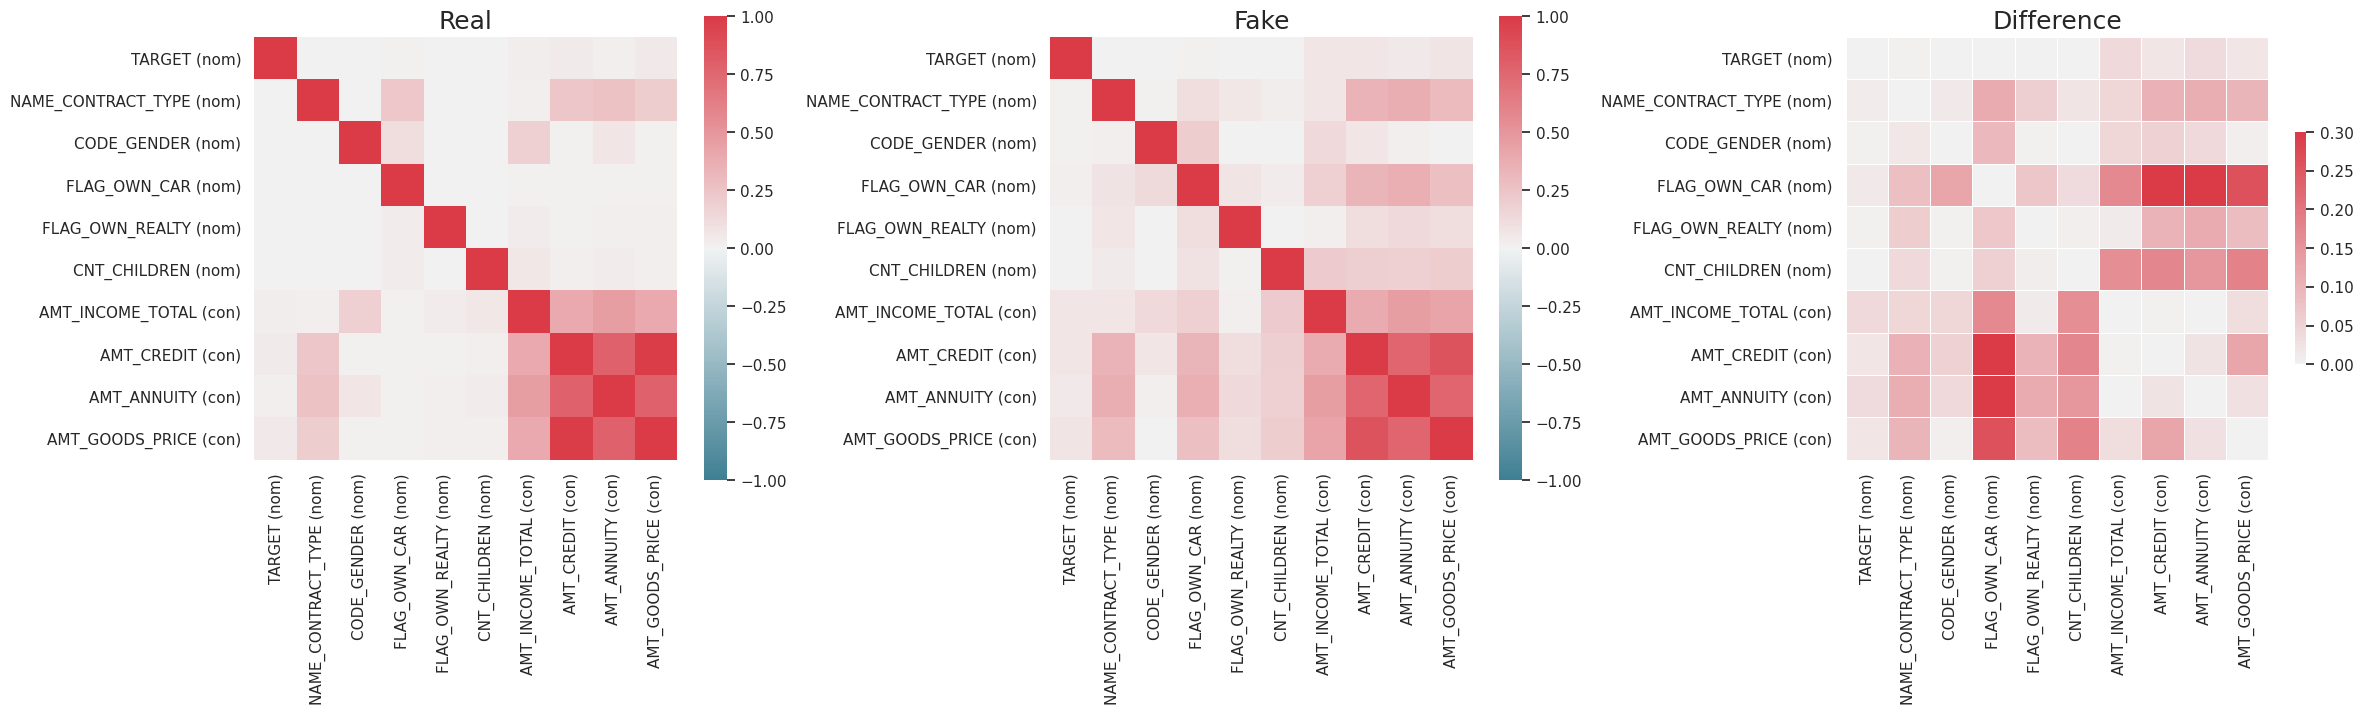

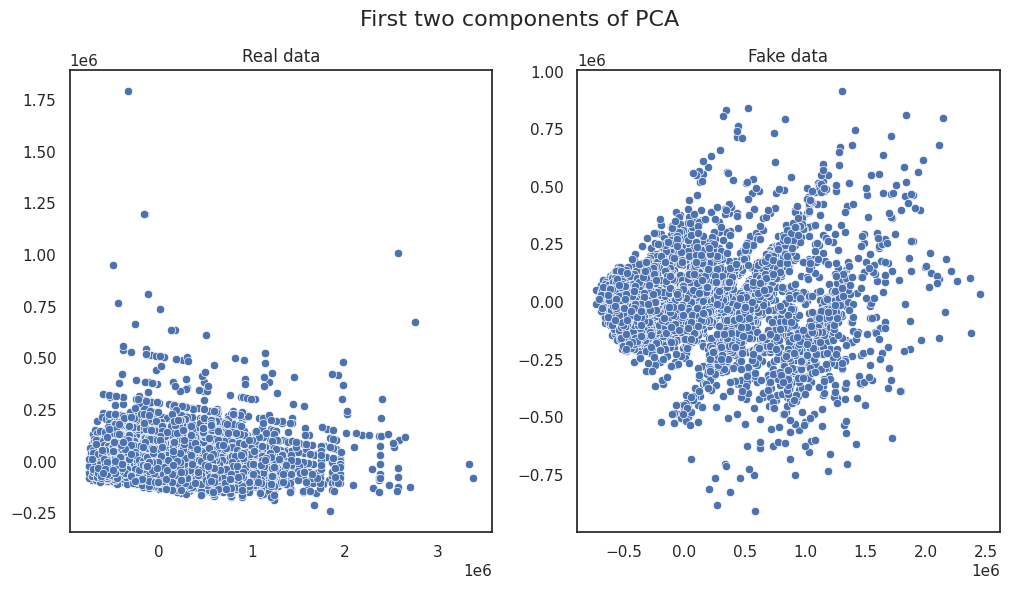

In [34]:
# Analyze Synthetic Data

from table_evaluator import TableEvaluator

print(data.shape, synthetic_data.shape)
table_evaluator =  TableEvaluator(data, synthetic_data, cat_cols= categorical_features)

table_evaluator.visual_evaluation()

<Axes: >

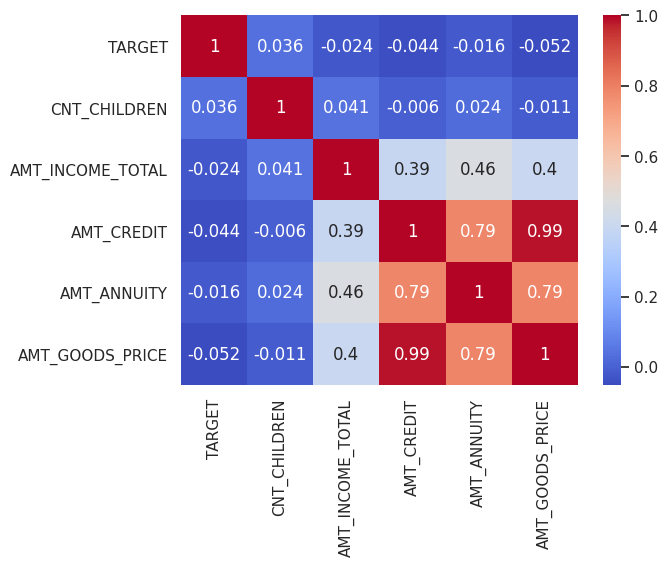

In [35]:
# compute the correlation matrix
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: >

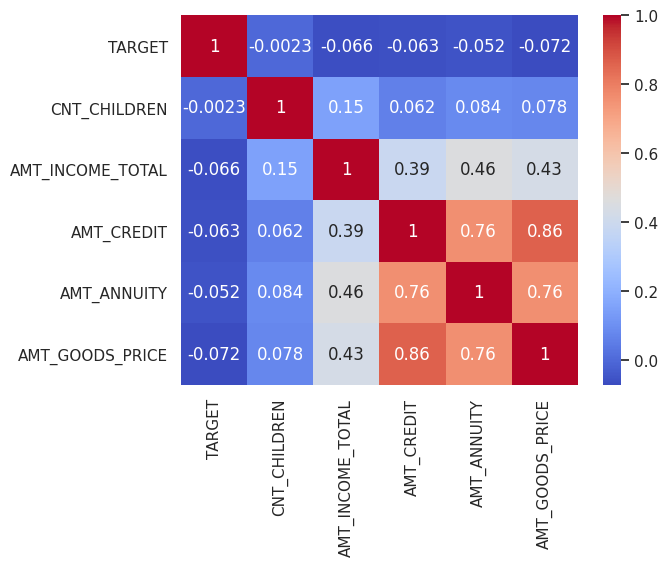

In [36]:
# compute the correlation matrix
corr = synthetic_data.corr()

# plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [37]:
#show summary statistics REAL DATA
summary = data.describe()
print(summary)

            TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  9993.000000   9993.000000      9.993000e+03  9.993000e+03   
mean      0.077454      0.416291      1.674856e+05  6.009870e+05   
std       0.267324      0.722247      9.423835e+04  4.032958e+05   
min       0.000000      0.000000      2.565000e+04  4.500000e+04   
25%       0.000000      0.000000      1.125000e+05  2.700000e+05   
50%       0.000000      0.000000      1.440000e+05  5.135310e+05   
75%       0.000000      1.000000      2.025000e+05  8.100000e+05   
max       1.000000      7.000000      1.935000e+06  2.961000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  
count    9993.000000     9.993000e+03  
mean    27097.641399     5.403851e+05  
std     14384.476862     3.708941e+05  
min      2596.500000     4.500000e+04  
25%     16443.000000     2.385000e+05  
50%     24997.500000     4.500000e+05  
75%     34650.000000     6.840000e+05  
max    135936.000000     2.961000e+06  


In [38]:
#show summary statistics SYNTHETIC DATA
summary = synthetic_data.describe()
print(summary)

            TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  9997.000000   9997.000000       9997.000000  9.997000e+03   
mean      0.066620      0.613684     168153.373782  5.611396e+05   
std       0.249375      0.832756     104419.069199  3.862835e+05   
min       0.000000      0.000000      17991.200000  3.882800e+03   
25%       0.000000      0.000000      97630.900000  2.408146e+05   
50%       0.000000      0.000000     153573.500000  4.853163e+05   
75%       0.000000      1.000000     210392.800000  7.820992e+05   
max       1.000000      7.000000     901917.300000  2.696128e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  
count    9997.000000     9.997000e+03  
mean    26702.073872     5.103047e+05  
std     15811.966243     3.391249e+05  
min      1193.500000     2.069200e+03  
25%     13779.700000     2.425695e+05  
50%     24669.200000     4.461972e+05  
75%     35929.300000     6.914468e+05  
max    129596.900000     2.148794e+06  
